In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from lolviz import *

# Introduction to Hashtable

Nowadays, we are generating, referring, and using data every day. As data set getting tremendous, searching the intereted element can be extremly chanllenging. 
As a data scientist, to achieve the goals of efficient data retrieving, we can use hashtable, a mapping data structure and a simple algorithm.  
Today we will cover the following topics:
* Set up a hashtable
* A good hash function
* An example of applying hasthtable in document searching

In [2]:
# an optional data set to use
url = 'https://wiki2.org/en/List_of_current_ships_of_the_United_States_Navy'
html = requests.get(url).content
df_list = pd.read_html(html, encoding = 'latin1')
dfo = df_list[0]
dfo.head(5)

,Ship name,Hull number,Class,Type,Commission date,Homeport[2],Note
0,USSÂ Abraham Lincoln,NaN,Nimitz,Aircraft carrier,11 November 1989,"San Diego, CA",[3]
1,USSÂ Alabama,NaN,Ohio,Ballistic missile submarine,25 May 1985,"Bangor, WA",[4]
2,USSÂ Alaska,NaN,Ohio,Ballistic missile submarine,25 January 1986,"Kings Bay, GA",[5]
3,USSÂ Albany,NaN,Los Angeles,Attack submarine,7 April 1990,"Norfolk, VA",[6]
4,USSÂ Alexandria,NaN,Los Angeles,Attack submarine,29 June 1991,"San Diego, CA",[7] Scheduled for decommissioning 2026[8]


In [3]:
# randomly generated data indcluding id, name, email and gender
df = pd.read_csv('MOCK_DATA.csv')
df.head(5)

,id_num,first_name,last_name,email,gender,id_char
0,5808,Aluin,Derl,aderl0@epa.gov,Male,tzs
1,7652,Vivienne,Roggieri,vroggieri1@chicagotribune.com,Female,sri
2,3412,Barnebas,Horlick,bhorlick2@umich.edu,Male,fwm
3,1370,Worth,Boich,wboich3@wikispaces.com,Male,bqt
4,5169,Nealon,Klein,nklein4@washington.edu,Male,cku


# Linear Search throug List

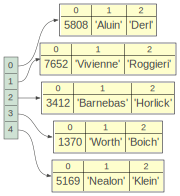

In [4]:
# selecte the numeric id and name columns from the data set
data = np.array(df)
name_list = []
for record in data:
    name_list.append((record[0], record[1], record[2]))
objviz(name_list[:5])              

In [5]:
# the linear_search function look up the employee i through the entire data set and find the matching one

def linear_search(employee_id):
    for record in name_list:
        if record[0] == employee_id:
            return record

In [6]:
employee_id = 8550
linear_search(employee_id)

(8550, 'Niven', 'Bester')

# Steps to set up a hashtable

## Use numeric keys to set up hashtable

### Step 1: set up empty buckets

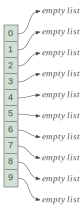

In [7]:
# set up 10 empty buckets
buckets = [[] for i in range(10)] # make sure each bucket is a separate list
objviz(buckets)

### Step 2: define a hush function

In [8]:
# set up a hash function to convert employee_id as key to index

def hash_n(key):
    return key % 10

[(k[0], hash_n(k[0])) for k in name_list[:5]]

[(5808, 8), (7652, 2), (3412, 2), (1370, 0), (5169, 9)]

### Step 3: Store data in buckets

In [9]:
# store data in the format of (key,value) pairs

for record in name_list[:10]:
    index = hash_n(record[0])
    buckets[index].append(record)

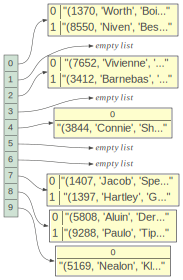

In [10]:
lolviz(buckets)

### Search in Hashtable

In [11]:
employee_id = 8550
# search employee id in the corresponding bucket
index = hash_n(employee_id)
result = 'No record found'
for record in buckets[index]:
    if record[0] == employee_id:
        result = record
        
print(result)

(8550, 'Niven', 'Bester')


## Use string type key to set up hash table

In [12]:
# use english characters as employee id
name_list2 = []
for record in data:
    name_list2.append((record[5], record[1], record[2]))
name_list2[:5]

[('tzs', 'Aluin', 'Derl'),
 ('sri', 'Vivienne', 'Roggieri'),
 ('fwm', 'Barnebas', 'Horlick'),
 ('bqt', 'Worth', 'Boich'),
 ('cku', 'Nealon', 'Klein')]

In [13]:
# convert letters to numbers then to index
def hash_c(key):
    return ord(key[0]) % 10

[(k[0], hash_c(k[0])) for k in name_list2[:5]]

[('tzs', 6), ('sri', 5), ('fwm', 2), ('bqt', 8), ('cku', 9)]

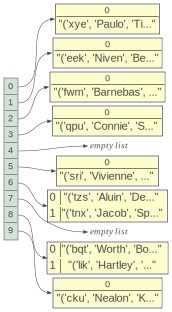

In [14]:
# set up buckets and store the first 10 records in the buckets
buckets = [[] for i in range(10)] 

for record in name_list2[:10]:
    index = hash_c(record[0])
    buckets[index].append(record)
    
lolviz(buckets)   

In [15]:
employee_id = 'xye'
# search employee id in the corresponding bucket
index = hash_c(employee_id)
result = 'No record found'
for record in buckets[index]:
    if record[0] == employee_id:
        result = record
        
print(result)

('xye', 'Paulo', 'Tipping')
